# Box Office Revenue Prediction.

## Submitted by:
## Vitaly Pankratov 961152147
## Eden Bar 318471208

### Link to the github: https://github.com/Stayermax/BORP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from  copy import deepcopy
from collections import OrderedDict
from ast import literal_eval

In [2]:
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"]=18,18

# Exploratory Data Analysis

In [3]:
train_df = pd.read_csv('data/train.tsv', sep='\t')
train_df.head(3)

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."


In [4]:
test_df = pd.read_csv('data/train.tsv', sep='\t')
test_df.head(3)

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."


As you can see, some fields are represented as dictionaries or list of dictionaries.

During data preprocessing we will change those fields and update their values.

### Dataset features

Let us check and see what information we can extract from the dataframes:

In [5]:
train_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


In [6]:
train_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000


The first thing we notice of is that the 'budget' and 'runtime' features obtain zero values in both the train and test dataframes, which is hardly possible in the real world. 

Another anomoly we found is that the minimal revenue in both dataframes equals to 1, which is a bit strange. 

In the following sections we will handle the missing data and explain how we do so.

### Feature distribution

To explore the relationship between features we gonna build correlation matrix and pairplot

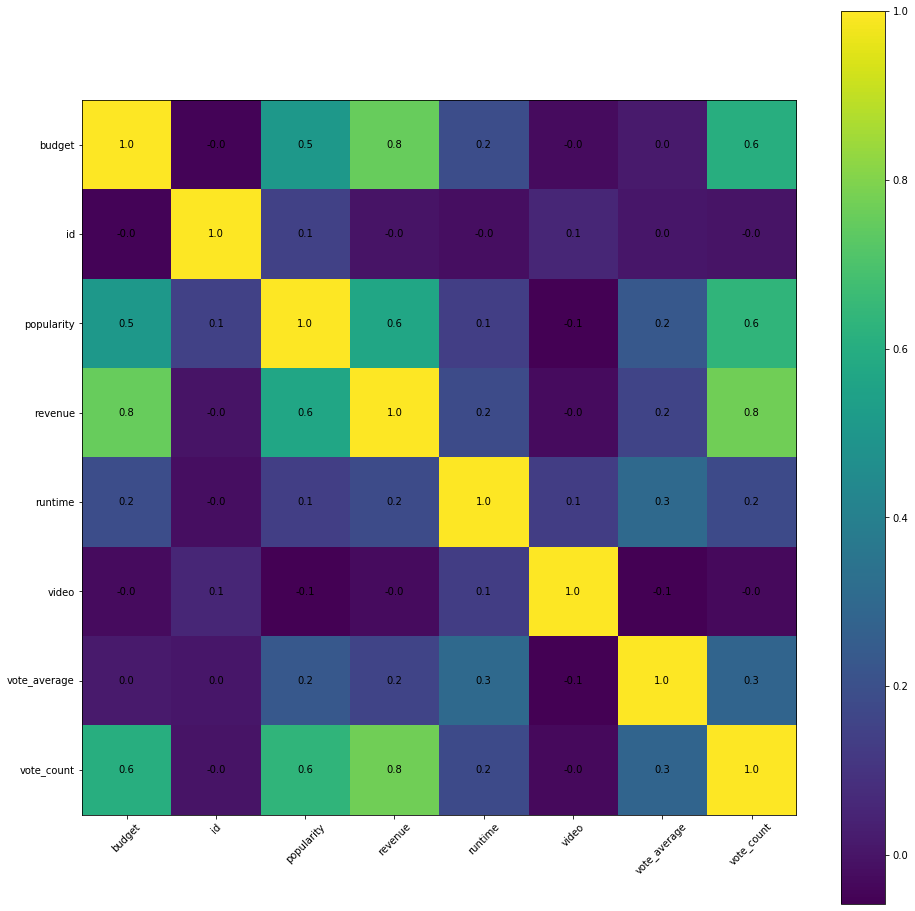

In [7]:
PLT_5 = plt.matshow(train_df.corr())
plt.xticks(range(len(train_df.corr())), train_df.corr().columns)
plt.yticks(range(len(train_df.corr())), train_df.corr().columns)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.colorbar()
plt.xticks(rotation=45)
for (i, j), z in np.ndenumerate(train_df.corr()):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

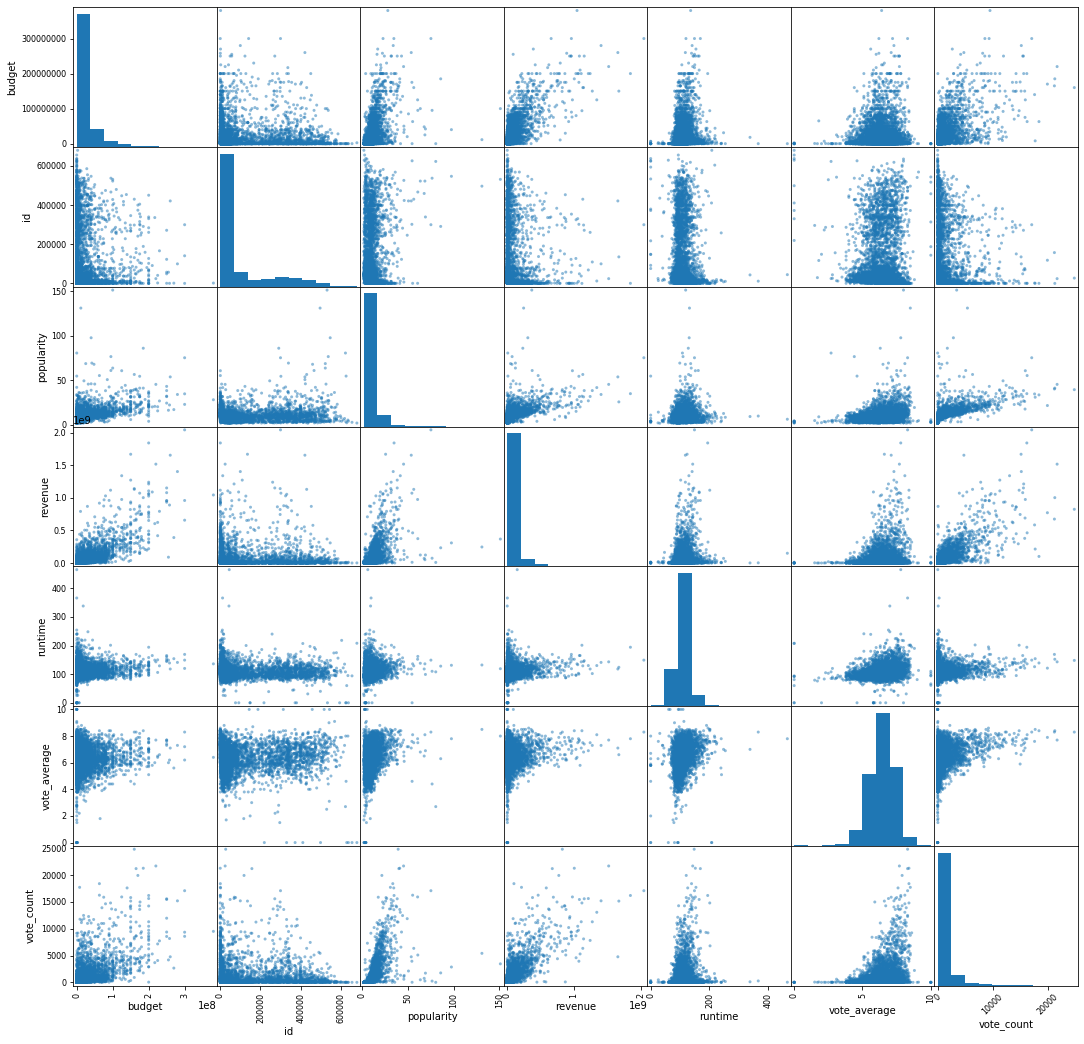

In [8]:
numerical_df = train_df[['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
pd.plotting.scatter_matrix(numerical_df)
# PLT_pairs = sns.pairplot(numerical_df, kind='reg')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

From the correlation matrix, we noticed that the 'budget', 'popularity' and 'vote_count' fields have a high correlation with the 'revenue' field. This intersting realationship will be taken advantaged and used later on, specifically in the process of feature creation for the regression models.

### Missing data

As we have detected previously, the 'budget' and 'runtime' fields contain missing values, a fact we will attend to in the scope of this exrecise. However, we are looking to detect all fields that suffer from missing values and not only in the fileds that are composed of numerical values. 

First, we want to find out the number of zeros in the 'budget' and 'runtime' fields, fields we already know suffer from missing values:

In [9]:
for col in train_df.columns:
    print(f"{col}: {len(train_df[col]) - np.count_nonzero(train_df[col])}")

backdrop_path: 0
belongs_to_collection: 0
budget: 1487
genres: 0
homepage: 0
id: 0
imdb_id: 0
original_language: 0
original_title: 0
overview: 0
popularity: 0
poster_path: 0
production_companies: 0
production_countries: 0
release_date: 0
revenue: 0
runtime: 12
spoken_languages: 0
status: 0
tagline: 0
title: 0
video: 5197
vote_average: 9
vote_count: 8
Keywords: 0
cast: 0
crew: 0


We have found that almost 30% of the 'budget's field data is missing, thus, restoring thise values is close to immpossible. However, in case of runtime we can try and restore zero values, since there are only 12 samples that are absent out of 5150.

We have also decided to remove the 'runtime' field.

##### Other fields that contain zeros:
Other fields in the data we have found to contain zero values and how we chose to handle them:

'video' - all of the values in this field are the same, therefore, we have decided to remove this field and not to continue with it in our future work in this excercise.

Two other fields we found that contain zero values are 'vote_count' and 'vote_average'. This discovery did not bother us, since they can have values that equal 0 and it would make sense. For example, a value can equal 0 if nobody have watched the film and/or graded it with 0 score.

Now, let us search for missing values (that are not zero) in the other fields in our data: 

In [10]:
train_df.isnull().sum()

backdrop_path             577
belongs_to_collection    4150
budget                      0
genres                      0
homepage                 3449
id                          0
imdb_id                    15
original_language           0
original_title              0
overview                    6
popularity                  0
poster_path               167
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     4
spoken_languages            0
status                      0
tagline                  1025
title                       0
video                       0
vote_average                0
vote_count                  0
Keywords                    0
cast                        0
crew                        0
dtype: int64

#### Missing fields in the data:

'backdrop_path' - describes the path to the movie's backdrop image and we won't use it in our research.

'belongs_to_collection' - the name and id of a film collection (series) that includes the movie. Since approx. 80% of the whole dataset don't have collection (not included in a collection), we have come to realize that this field can not be restored. However, that does not mean that the information is completly lost. We can think about the relations between movies that belong to a collection and movies that don't belong to a collection. Thus, in the next part we will replace this field with an alternative field that will be used as an indicator that shows if a movie belongs to a colllection

'imdb_id' - id on the imdb site, we won't use this field.

'poster_path' - the path to a movie poster image and we won't use it in our research.

'tagline' - the tagline of the movie. Since about 20% of this field is missing and it is a textual field, it's impossible to restore it's value so we decided to drop it.

### Untill now we have searched for missing values in the train dataset. However, as you can see, the test_df  dataset lacks the same fields:

In [11]:
test_df.isnull().sum()

backdrop_path             577
belongs_to_collection    4150
budget                      0
genres                      0
homepage                 3449
id                          0
imdb_id                    15
original_language           0
original_title              0
overview                    6
popularity                  0
poster_path               167
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     4
spoken_languages            0
status                      0
tagline                  1025
title                       0
video                       0
vote_average                0
vote_count                  0
Keywords                    0
cast                        0
crew                        0
dtype: int64

Since some of the fields are dictionaries or lists, it is possible that there are empty slots. This case will be attended to  during features creation.

## Some service functions to help us before we proceed to features engineering

In [12]:
def __generateGenresDict(data):
    """
    Generates dictionary of all genres with it's id as key.
    :param df:
    :return:
    """
    res = {}
    all_genres = data['genres']
    for el in all_genres:
        LoD = strIntoLoD(el)
        for el in LoD:
            if (el['id'] not in res.keys()):
                res[el['id']] = el['name']
    ordered_res = OrderedDict(sorted(res.items(), key=lambda item: item[0]))
    return ordered_res

def __removeUnpopularIds(listOfIds, popularIds):
    """
    :param listOfIds: List of ids
    :param popularIds: Most popular agent over whole population
    :return: listOfIds without agents that aren't popular
    """
    res = []
    for id in listOfIds:
        if (id in popularIds.keys()):
            res.append(id)
    return res


def __topNfromField(listOfIds, popularIds, N=3):
    """

    :param listOfIds: List of ids
    :param popularIds: Most popular agent over whole population
    :param N: Number of best (most popular, profitable, etc.) ids that we return
    :return:
    """
    idPopularity = {}
    for id in listOfIds:
        idPopularity[id] = popularIds[id]
    ordered_agentFilmNumber = OrderedDict(sorted(idPopularity.items(), key=lambda item: item[1], reverse=True))
    topN = [el[0] for el in list(ordered_agentFilmNumber.items())[:N]]
    return topN


def __popularityFromField(data, field, threshold=3, topN=-1):
    res = {}
    for ids in data[field]:
        for id in ids:
            if (id in res.keys()):
                res[id] += 1
            else:
                res[id] = 1
    topIds = {}
    for id in res.keys():
        if (res[id] >= threshold):
            topIds[id] = res[id]
    ordered_res = OrderedDict(sorted(topIds.items(), key=lambda item: item[1], reverse=True))

    return ordered_res


def __profitFromField(data, field, threshold_profit=0, topN=-1):
    """
    Return dictionary of id:mean profit of id (topN of ids)
    :param field:
    :param threshold_profit:
    :return:
    """
    res = {}
    for index, row in data.iterrows():
        ids = row[field]
        for id in ids:
            if (id in res.keys()):
                res[id]['profit'] += row['revenue']
                res[id]['movies_num'] += 1
            else:
                res[id] = {'profit': row['revenue'], 'movies_num': 1}
    topIds = {}

    for id in res.keys():
        if (res[id]['profit'] / res[id]['movies_num'] >= threshold_profit):
            topIds[id] = res[id]['profit'] / res[id]['movies_num']

    ordered_res = OrderedDict(sorted(topIds.items(), key=lambda item: item[1], reverse=True)[:topN])
    # print(f'Top keywords: {ordered_res}')
    return ordered_res


def __generateAgentIdsDict(data, field):
    """

    :param field: string LoD
    :return: dictionary
    """
    res = {}
    field_data = data[field].apply(strIntoLoD).values
    for row in field_data:
        for el in row:
            res[el['id']] = el['name']
    return res


def __getProfictCategory(value, bins):
    category = 0

    if (value <= bins[0]):
        return 0
    elif (value > bins[-1]):
        return len(bins) - 1
    else:
        for i, bin in enumerate(bins):
            if (i != 0):
                if (value > bins[i - 1] and value <= bins[i]):
                    return i - 1


def getDirector(LoD, nameOrId):
    for d in LoD:
        if (d['job'] == 'Director'):
            return d[nameOrId]
    if (nameOrId == 'name'):  # In case that we don't know who director is
        return 'Vitaly Pankratov'
    else:
        return -1


def averageIfZero(budget, year, yearAverageBudgetDict):
    if (budget == 0):
        if (year in yearAverageBudgetDict.keys()):
            return yearAverageBudgetDict[year]
        else:
            closest_year_plus = year
            closest_year_minus = year
            while ((closest_year_plus not in yearAverageBudgetDict.keys())
                   and (closest_year_minus not in yearAverageBudgetDict.keys())):
                closest_year_plus += 1
                closest_year_minus -= 1
            if (closest_year_plus in yearAverageBudgetDict.keys()):
                return yearAverageBudgetDict[closest_year_plus]
            else:
                return yearAverageBudgetDict[closest_year_minus]
    else:
        return budget


def dictOrNaN(DoN):
    if (type(DoN) == type(8.5)):
        return {'id': -1, 'name': 'No Collection'}
    else:
        return literal_eval(DoN)


def strIntoLoD(string):
    """
    :param string: string format: [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
    :return:
    """
    if (string[0] == '['):
        string = string[1:-1]
    LIST = string.split('}, ')
    res = []
    for i, el in enumerate(LIST):
        if (len(el) == 0):
            continue
        if (i != len(LIST) - 1):
            el = el + '}'
        res.append(literal_eval(el))
    return res


def getIDsFromListofDicts(LoD):
    """

    :param LoD: list of dictionaries [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]
    :return: ids from this list
    """
    res = [el['id'] for el in LoD]
    return res

# Feature Engineering

The dataCleaning function cleans a dataframe from excess columns and creates features fields. We will apply this function on the train_df and test_df datasets and explain the obtained results.

In [13]:
def dataCleaning(data, train=True, pretrained_data={}):

    if (train != True):
        mostProfitableActors = pretrained_data['mostProfitableActors']  # Ordered Dict actor id: actor mean proffit
        dir_bins = pretrained_data['dir_bins']  # List directors bins by profit
        yearMeanRevenue = pretrained_data['yearMeanRevenue']  # Dict year: year mean revenue
        directorProfit = pretrained_data['directorProfit']  # Dict director id : director mean profit
        topKeywords = pretrained_data['topKeywords']  # Ordered Dict keyword id: keyword film number
        keywordProfit = pretrained_data['keywordProfit']  # Ordered Dict keyword id: keyword mean profit
        mostProductiveCompanies = pretrained_data[
            'mostProductiveCompanies']  # Ordered Dict Company Id: Number of company films
        companiesIds = pretrained_data['companiesIds']  # Dict Company Id : Company Name
    else:
        genres_dict = __generateGenresDict(data)

        
    # Genres
    data['genresIDs'] = data['genres'].apply(strIntoLoD)
    data['genresIDs'] = data['genresIDs'].apply(getIDsFromListofDicts)

    # Production companies
    data['prodCompIDs'] = data['production_companies'].apply(strIntoLoD)
    data['prodCompIDs'] = data['prodCompIDs'].apply(getIDsFromListofDicts)

    # Collection
    data['isInCollection'] = data['belongs_to_collection'].apply(lambda x: int(type(x) != type(0.1)))

    # Year
    data['year'] = data['release_date'].apply(lambda x: x.split('-')[0])
    data['year'] = pd.to_numeric(data["year"])

    # Month
    data['month'] = data['release_date'].apply(lambda x: x.split('-')[1])
    data['month'] = pd.to_numeric(data["month"])
    
#     # Runtime
#     data['runtime'] = pd.to_numeric(data["runtime"])
#     data['runtime'] = data['runtime'].apply(lambda x: x if(x!=0) else data['runtime'].mean())
    

    # revenue by year:
    if (train == True):
        yearMeanRevenue = {}
        for index, row in data[['year', 'revenue']].groupby('year').mean().iterrows():
            yearMeanRevenue[index] = row['revenue']

            # Companies: We took top 10 companies with the biggest number of films
    data['companiesIDs'] = data['production_companies'].apply(strIntoLoD)
    data['companiesIDs'] = data['companiesIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        mostProductiveCompanies = __popularityFromField(data, 'companiesIDs', threshold=0, topN=5)
        companiesIds = __generateAgentIdsDict(data, field='production_companies')
    else:
        # in case of test, mostProductiveCompanies should already be defined
        pass
    data['companiesIDs'] = data['companiesIDs'].apply(lambda x: __removeUnpopularIds(x, mostProductiveCompanies))

    # Most Popular Actors
    data['castIDs'] = data['cast'].apply(strIntoLoD)
    data['castIDs'] = data['castIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        mostProfitableActors = __profitFromField(data, field='castIDs', threshold_profit=0,
                                                 topN=20000)  # Actors with the most number of movies
    else:
        # in case of test, topActors should already be defined
        pass
    data['castIDs'] = data['castIDs'].apply(lambda x: __removeUnpopularIds(x, mostProfitableActors))
    data['castIDs'] = data['castIDs'].apply(lambda x: __topNfromField(x, mostProfitableActors, 40))
    data['topActorsNum'] = data['castIDs'].apply(len)
    # actorIds = __generateAgentIdsDict(field='cast')

    # Director
    data['crew'] = data['crew'].apply(strIntoLoD)
    data['director'] = data['crew'].apply(getDirector, args=('name',))
    data['directorID'] = data['crew'].apply(getDirector, args=('id',))
    # directorIds = dict([(row['directorID'], row['director']) for index, row in data.iterrows()])

    # Director categories:
    if (train):
        directorProfit = data.groupby('directorID').mean()['revenue'].to_dict()
        min_rev = min(directorProfit)
        max_rev = max(directorProfit)
        dir_bins_N = 10
        step = (max_rev - min_rev) / dir_bins_N
        dir_bins = np.arange(min_rev, max_rev, step)

        data['directorCat'] = data['directorID'].apply(
            lambda x: __getProfictCategory(directorProfit[x], dir_bins))
    else:
        # In this case dir_bins_N should be already defined, as well as directorProfit
        data['directorCat'] = data['directorID'].apply(
            lambda x: __getProfictCategory(directorProfit[x], dir_bins) if (x in directorProfit.keys()) else 5)

    # Most Popular keywords
    data['popularKeywordsIDs'] = data['Keywords'].apply(strIntoLoD)
    data['popularKeywordsIDs'] = data['popularKeywordsIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        topKeywords = __popularityFromField(data, field='popularKeywordsIDs',
                                            threshold=3)  # Keywords with the most number of movies
    else:
        # In this case topKeywords should be predefined
        pass
    data['popularKeywordsIDs'] = data['popularKeywordsIDs'].apply(lambda x: __removeUnpopularIds(x, topKeywords))
    data['popularKeywordsIDs'] = data['popularKeywordsIDs'].apply(lambda x: __topNfromField(x, topKeywords, 20))
    # keywordsIds = __generateAgentIdsDict(field='Keywords')

    # Most Profitable Keywords
    data['profitableKeywordsIDs'] = data['Keywords'].apply(strIntoLoD)
    data['profitableKeywordsIDs'] = data['profitableKeywordsIDs'].apply(getIDsFromListofDicts)
    if (train == True):
        keywordProfit = __profitFromField(data, field='profitableKeywordsIDs', threshold_profit=100000,
                                          topN=1000)  # Keywords with biggest mean profits
    else:
        # In this case keywordProfit should be predefined
        pass
    data['profitableKeywordsIDs'] = data['profitableKeywordsIDs'].apply(
        lambda x: __removeUnpopularIds(x, keywordProfit))
    data['profitableKeywordsIDs'] = data['profitableKeywordsIDs'].apply(
        lambda x: __topNfromField(x, keywordProfit, 14))
    data['profitableKeywordsNum'] = data['profitableKeywordsIDs'].apply(len)

    # topNkeyIds = [el[0] for el in list(keywordProfit.items())[:50]]
    # topNWords = []
    # for wid in topNkeyIds:
    #     print([wid, keywordsIds[wid], keywordProfit[wid]])

    to_delete_cols = ['backdrop_path', 'homepage', 'poster_path', 'video',
                      'genres', 'production_companies', 'original_language',
                      'imdb_id', 'tagline', 'status',
                      'belongs_to_collection', 'release_date', 'original_title',
                      'crew', 'cast', 'Keywords', 'production_countries', 
                      'budget', 'spoken_languages', 'overview', 'vote_average' ,
                      'director', 'directorID', 'popularKeywordsIDs','runtime', 'castIDs', 'profitableKeywordsIDs']

    # Delete low data:
    for col in to_delete_cols:
        data.drop(col, axis=1, inplace=True)

    # # show_cols sorted by revenue
    # show_cols = ['revenue', 'title', 'year','directorCat','profitableKeywordsNum']
    # a = data.sort_values('revenue')[show_cols].values
    # for el in a:
    #     print(el)
    trained_data = {}
    if (train == True):
        trained_data['genres_dict'] = genres_dict
        trained_data['mostProfitableActors'] = mostProfitableActors
        trained_data['dir_bins'] = dir_bins
        trained_data['yearMeanRevenue'] = yearMeanRevenue
        trained_data['directorProfit'] = directorProfit
        trained_data['topKeywords'] = topKeywords
        trained_data['keywordProfit'] = keywordProfit
        trained_data['mostProductiveCompanies'] = mostProductiveCompanies
        trained_data['companiesIds'] = companiesIds

    return data, trained_data


In [14]:
clear_train_df, trained_data  = dataCleaning(data=train_df, train=True)

In [15]:
clear_train_df.head()

,id,popularity,revenue,title,vote_count,genresIDs,prodCompIDs,isInCollection,year,month,companiesIDs,topActorsNum,directorCat,profitableKeywordsNum
0,559,22.024,890871626,Spider-Man 3,8180,"[14, 28, 12]","[19551, 5, 326, 34]",1,2007,5,"[19551, 5, 326, 34]",40,9,12
1,50719,4.756,154323,"Silent Night, Deadly Night Part 2",68,"[35, 27]",[18924],1,1987,4,[18924],1,0,1
2,469062,4.746,176236,Scotty and the Secret History of Hollywood,15,[99],[88564],0,2018,7,[88564],1,0,0
3,9003,13.828,14564027,Hellraiser,1115,[27],"[1950, 15338, 15339, 15340]",1,1987,9,"[1950, 15338, 15339, 15340]",1,9,0
4,11153,15.070,61399552,National Lampoon's Vacation,782,"[35, 12]",[174],1,1983,7,[174],2,9,1


In [16]:
clear_test_df, zero_data  = dataCleaning(data=test_df, train=False, pretrained_data=trained_data)

In [17]:
clear_test_df.head()

,id,popularity,revenue,title,vote_count,genresIDs,prodCompIDs,isInCollection,year,month,companiesIDs,topActorsNum,directorCat,profitableKeywordsNum
0,559,22.024,890871626,Spider-Man 3,8180,"[14, 28, 12]","[19551, 5, 326, 34]",1,2007,5,"[19551, 5, 326, 34]",40,9,12
1,50719,4.756,154323,"Silent Night, Deadly Night Part 2",68,"[35, 27]",[18924],1,1987,4,[18924],1,0,1
2,469062,4.746,176236,Scotty and the Secret History of Hollywood,15,[99],[88564],0,2018,7,[88564],1,0,0
3,9003,13.828,14564027,Hellraiser,1115,[27],"[1950, 15338, 15339, 15340]",1,1987,9,"[1950, 15338, 15339, 15340]",1,9,0
4,11153,15.070,61399552,National Lampoon's Vacation,782,"[35, 12]",[174],1,1983,7,[174],2,9,1


Now we have cleaned and prepared our data, we will explain the received columns of each of the two datasets, clear_train_df and clear_train_df.

## Features list:

##### Popularity  and vote_count (Numerical features)
As we saw in the first part of the report, there is a high correlation between the 'Popularity', 'vote_count' and 'revenue' fields, thus we use them as features.

##### genresIDs ( Categorical feature)
Id's of genres that the movie belongs to.

##### prodCompIDs  ( Categorical feature)
Id's of Video Studios that created the movie. We take into account only the top 5 companies with the highest number of created films, so if a movie was created by a group small companies, this field would be empty.
This field will be interpreted as a vector of length 5 with 1's in the places corresponding to a specific production company.

##### isInCollection (Bool feature)
1 if a movie belong to a collection and 0 otherwise.

##### year  (Numerical feature)
The release year of the movie (obtained from the 'release_date' field).

##### month (Categorical feature)
The release month of the movie. This field will be interpreted as a vector of length 12 with one 1 and 11 zeros corresponding to Release month i.e. the slot corresponding to the month will be lit (obtained from release_date field).

##### topActorsNum (Numerical feature)
The number of the most profitable actors from the dataset that take part in the movie where the most profitable actors are actors with hightest average movie revenue.

##### directorCat (Categorical feature)
We devided the directors into 10 groups depending on average revenue of each director's films. This field will be interpreted as a vector of length 10 with 1's in the place corresponding to the director's group.

##### profitableKeywordsNum (Numerical feature)
Number of most profitable keywords from dataset that describe the movie (created from field Keywords). Most profitable keywords are 1000 keywords with hightest average movie revenue.

##### YearAverageRevenue (Numerical feature)
Average movie revenue in movie release year. This feature derived from training data.

## Feature use explanation
To explain why we are planning to use those features, we've built some graphs to show the dependancy between those features and revenue.

First of all let's look at the correlation matrix:

In [18]:
clear_train_df.corr()['revenue']

id                      -0.001979
popularity               0.567924
revenue                  1.000000
vote_count               0.769808
isInCollection           0.305133
year                     0.133527
month                    0.036822
topActorsNum             0.731883
directorCat              0.199462
profitableKeywordsNum    0.746168
Name: revenue, dtype: float64

As you can see, the correlation between the 'revenue' field and numerical values is high for the 'popularity', 'vote_count', 'topActorsNum' and 'profitableKeywordsNum' fields, which is a good sign.

### Genres

In [19]:
geners_rev_df = pd.DataFrame(columns = ['genre', 'revenue'])
for index, row in clear_train_df[['genresIDs','revenue']].iterrows():
    for gid in row['genresIDs']:
        geners_rev_df = geners_rev_df.append({'genresIDs': gid, 'revenue':row['revenue']},ignore_index=True)
geners_rev_df['revenue'] =  pd.to_numeric(geners_rev_df['revenue'])
geners_rev_df[['genresIDs', 'revenue']]


,genresIDs,revenue
0,14.0,890871626.0
1,28.0,890871626.0
2,12.0,890871626.0
3,35.0,154323.0
4,27.0,154323.0
...,...,...
12869,10749.0,72258126.0
12870,28.0,29000301.0
12871,12.0,29000301.0
12872,35.0,29000301.0


In [20]:
plt.rcParams["figure.figsize"]=10,10

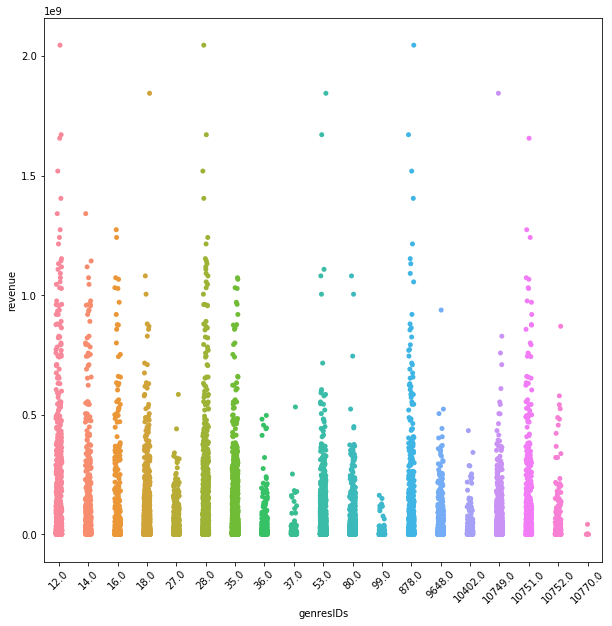

In [21]:
PLT = sns.stripplot(x="genresIDs", y="revenue", data=geners_rev_df)
PLT.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT

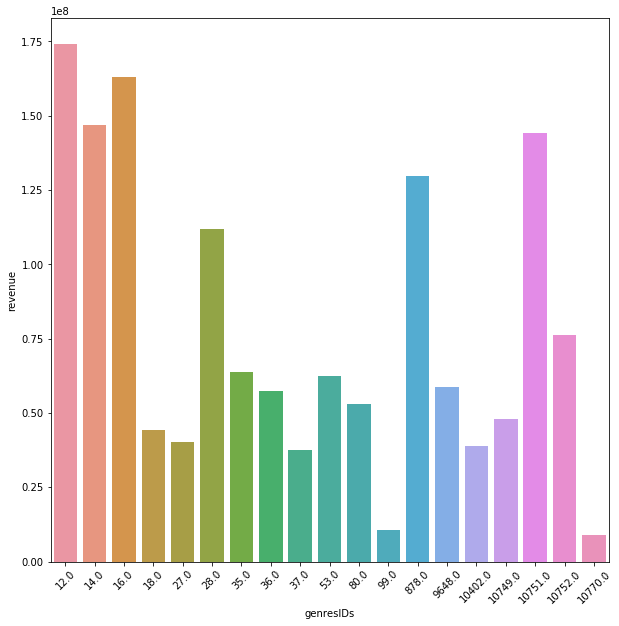

In [22]:
# By mean revenue:
ploted_data = geners_rev_df.groupby('genresIDs').mean().reset_index().sort_values('revenue')
PLT2 = sns.barplot(x="genresIDs", y="revenue", data = ploted_data)
PLT2.set_xticklabels(PLT.get_xticklabels(), rotation=45)
PLT2

### As we can see, from the two graphs above, the number of movies and film average revenue depends on genre, thus we use genre as a categorial feature

# prodCompIDs

In [23]:
cname_cid_df = pd.DataFrame.from_dict(trained_data['companiesIds'], orient='index').reset_index()
cname_cid_df['index'] = cname_cid_df['index'].astype(int)
cname_cid_df['index']
cid_profit_df = pd.DataFrame.from_dict(trained_data['mostProductiveCompanies'], orient='index').reset_index()
cid_profit_df['index'] = cid_profit_df['index'].astype(int)
cid_profit_df['index']
cname_profit = cname_cid_df.merge(cid_profit_df, left_on='index', right_on='index')
cname_profit['Company name'] = cname_profit['0_x']
cname_profit['Films number'] = cname_profit['0_y']
cname_profit = cname_profit.drop('0_x', axis = 1)
cname_profit = cname_profit.drop('0_y', axis = 1)
cname_profit = cname_profit.sort_values(by = 'Films number')
cname_profit

,index,Company name,Films number
2946,3957,Gener8Xion Entertainment,1
3910,3567,Room 9 Entertainment,1
3909,54280,Infinity Media,1
3908,5496,Cinezeta,1
3907,94719,Just Friends Productions,1
...,...,...,...
114,25,20th Century Fox,255
1,5,Columbia Pictures,256
27,4,Paramount,263
13,33,Universal Pictures,339


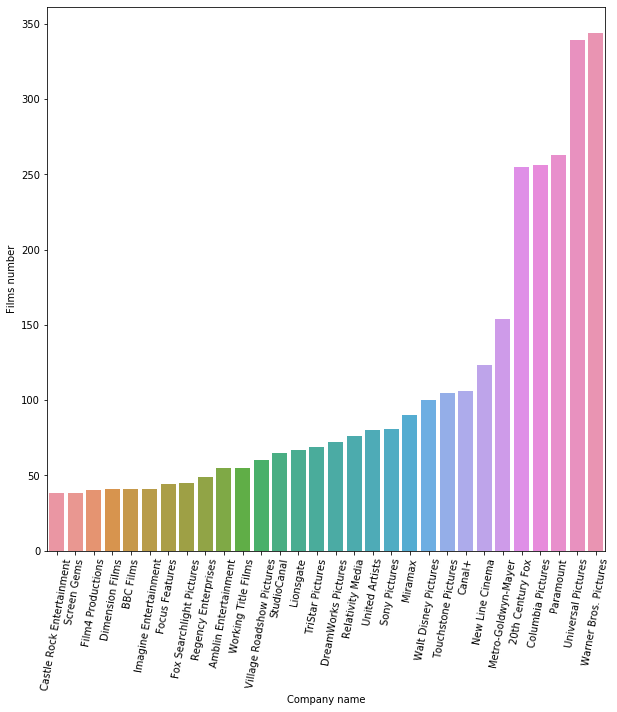

In [24]:
PLT_comp = sns.barplot(x='Company name', y='Films number', data = cname_profit[-30:])
PLT_comp.set_xticklabels(PLT_comp.get_xticklabels(), rotation=80)
pass

On the graph above you can see the relation between the Video Company and the number of movies that it produces. We can see that the top5 of this companies produce much more, than the others. This information can be relative to our prediction thus we would like to incorporate and use it in a way. 

# Year and month features
Movies are growing in numbers with time and the same goes for the average revenues values, as we can see on the nexא two graphs:

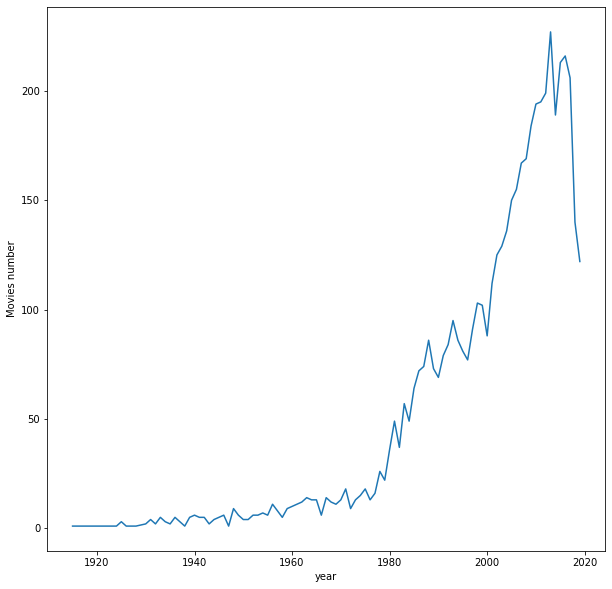

In [25]:
grpd = clear_train_df.groupby(['year']).size().to_frame('size').reset_index()
plt.figure(figsize=(10,10))
PLT01 = sns.lineplot(x="year", y="size", data=grpd)
PLT01.set(ylabel='Movies number')
pass

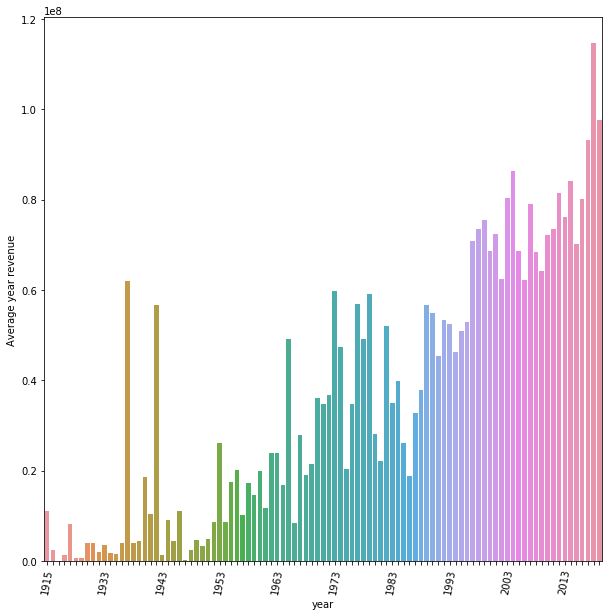

In [26]:
year_revenue_df = clear_train_df[['year', 'revenue']].groupby(['year']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT03 = sns.barplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.regplot(x="year", y="revenue", data=year_revenue_df)
# PLT03 = sns.stripplot(x="year", y="revenue", data=year_revenue_df)
PLT03.set_xticklabels(PLT03.get_xticklabels(), rotation=80)
PLT03.set(ylabel='Average year revenue')
# PLT03.set_yscale("log")
for ind, label in enumerate(PLT03.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass

### At the same time, average revenue isn't even all the times of the year. In order to use this knowledge we use the month feature.
Here is the distribution of average revenue by the month of the year:

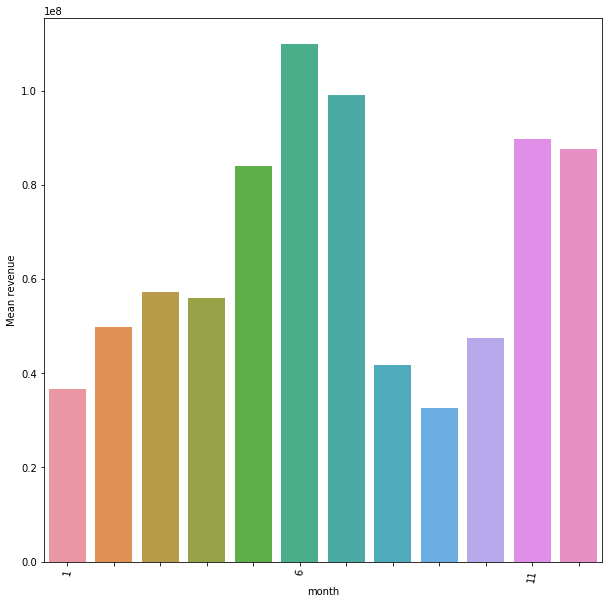

In [27]:
month_revenue_df = clear_train_df[['month', 'revenue']].groupby(['month']).mean().reset_index()
plt.figure(figsize=(10,10))
PLT04 = sns.barplot(x="month", y="revenue", data=month_revenue_df)
PLT04.set_xticklabels(PLT04.get_xticklabels(), rotation=80)
PLT04.set(ylabel='Mean revenue')

for ind, label in enumerate(PLT04.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
pass


# topActorsNum feature
As we already mentioned earlier, this feature represents number of the greatest (most profitable) actors of all time that played a role in this movie. It is only logical that many good actors can bring big box office.

To prove our point we implemented a regression graph, which doesn't look too bad and we also received a high correlation between the 'revenue' and 'topActorsNum'.

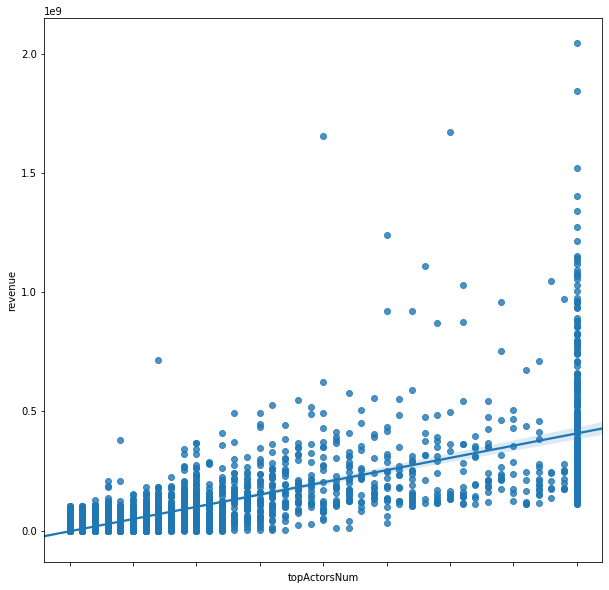

In [28]:
ploted_data = clear_train_df.groupby('topActorsNum').mean().reset_index().sort_values('revenue')
PLT8 = sns.regplot(x="topActorsNum", y="revenue", data= clear_train_df)
PLT8.set_xticklabels(PLT8.get_xticklabels(), rotation=45)
PLT8

# profitableKeywordsNum feature
As we did for the topActorsNum feature, we see high correlation between 'revenue' and 'profitableKeywordsNum' and the regression line also looks good.

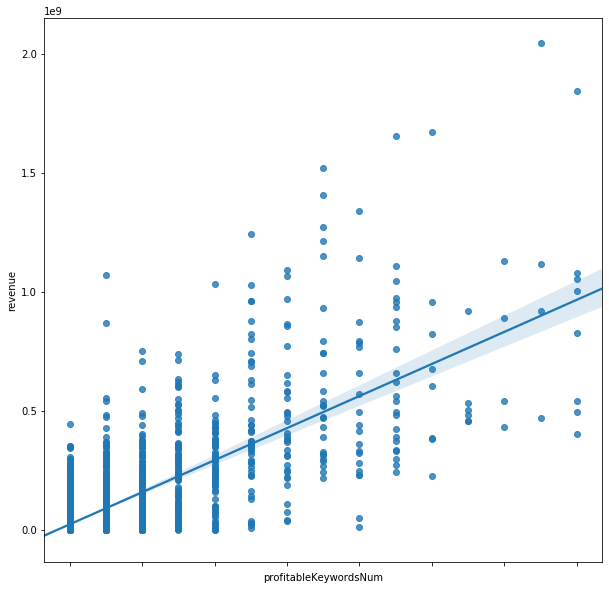

In [29]:
PLT7 = sns.regplot(x="profitableKeywordsNum", y="revenue", data= clear_train_df)
PLT7.set_xticklabels(PLT7.get_xticklabels(), rotation=45)
PLT7

# directorCat feature
As you can see on the graph below bins for the categories are taken in a way that directors in the same category provide similar revenue on average. This makes the first and the last categories bigger than others, but also cuts off critical values.

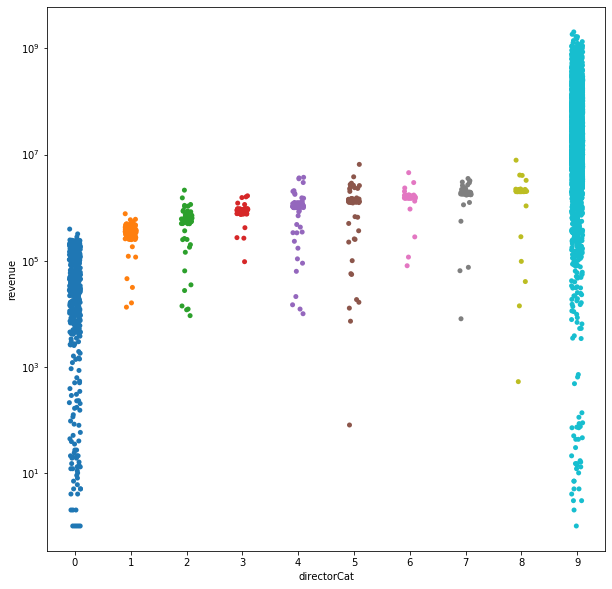

In [30]:
PLT9 = sns.stripplot(x="directorCat", y="revenue", data=clear_train_df)
PLT9.set_yscale("log")

# Handling missing data

The dataCleaning function takes care of missing data that appears in a few fields. However for the current features there is only one field that can be missing, which is the 'director' field.
In this case, where a movie director isn't defined we set it's category to be 5 (which is the meadian value when we are talking about directorCat/revenue relation).

# Prediction

In [31]:
import os
import pickle

The generateFeatures function generates a feature vectors list from the dataframe.

In [32]:
def generateFeatures(trained_data, df, cont_features_list, category_list):
    """
    :param trained_data: information dictionary with data obtained 
           from training set, like average revenue by year or list
           of most productive companies
    :param df: DataFrame that we will turn into features vectors list
    :param cont_features_list: list of Numerical features
    :param category_list:      list of Categorical fetures
    :return: 
    """
    X = []
    Features_names = deepcopy(cont_features_list)
    j = 0
    for index, row in df.iterrows():
        print(f'done: {j}/{len(df)}')
        j+=1
        Features_names = deepcopy(cont_features_list)
        X.append(list(row[cont_features_list].values))
        # add year avrg revenue
        cur_year = row['year']
        while(cur_year not in trained_data['yearMeanRevenue'].keys()):
            cur_year += 1
        Features_names.append('yearMeanRevenue')
        X[-1].append(trained_data['yearMeanRevenue'][cur_year])
        if('month' in category_list):
            for i in range(12):
                Features_names.append(f'month_{i+1}')
                if(row['month']==i+1):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
        if ('directorCat' in category_list):
            for i in range(len(trained_data['dir_bins'])):
                Features_names.append(f'dirCat_{i}')
                if (row['directorCat'] == i):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
        if('genresIDs' in category_list):
            # print(f'row genres: {row["genresIDs"]}')
            # print(f'genres_dict: {train_dp.genres_dict.items()}')
            for i, id_genre in enumerate(trained_data['genres_dict'].items()):
                Features_names.append(f'genre_{id_genre[0]}')
                if (id_genre[0] in row['genresIDs']):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
        if('companiesIDs' in category_list):
            for cid in trained_data['mostProductiveCompanies'].keys():
                Features_names.append(f'company_{cid}')
                if (cid in row['companiesIDs']):
                    X[-1].append(1)
                else:
                    X[-1].append(0)
    return X

RMSLE score function

In [33]:
### Utility function to calculate RMSLE
def rmsle(y_true, y_pred):
    """
    Calculates Root Mean Squared Logarithmic Error between two input vectors
    :param y_true: 1-d array, ground truth vector
    :param y_pred: 1-d array, prediction vector
    :return: float, RMSLE score between two input vectors
    """
    assert y_true.shape == y_pred.shape, \
        ValueError("Mismatched dimensions between input vectors: {}, {}".format(y_true.shape, y_pred.shape))
    return np.sqrt((1/len(y_true)) * np.sum(np.power(np.log(y_true + 1) - np.log(y_pred + 1), 2)))

### Final features that we use:

In [34]:
num_feats = ['popularity', 'vote_count', 'isInCollection',
             'profitableKeywordsNum', 'topActorsNum', 'year', ]
cat_feats = ['directorCat', 'month', 'genresIDs', 'companiesIDs']

We have also used trained_data['yearMeanRevenue'] as a representation for the 'YearAverageRevenue' feature.

### Create or load features representations

In [35]:
train_X_feat_path = 'No_classes_save/train_X.pkl'
if (os.path.exists(train_X_feat_path)):
    train_X = pickle.load(open(train_X_feat_path, "rb"))
else:
    train_X = generateFeatures(trained_data, clear_train_df, num_feats, cat_feats)
    pickle.dump(train_X, open(train_X_feat_path, "wb"))
train_y = list(clear_train_df['revenue'].values)


test_X_feat_path = 'No_classes_save/test_X.pkl'
if (os.path.exists(test_X_feat_path)):
    test_X = pickle.load(open(test_X_feat_path, "rb"))
else:
    test_X = generateFeatures(trained_data, clear_test_df, num_feats, cat_feats)
    pickle.dump(test_X, open(test_X_feat_path, "wb"))
test_y = list(clear_test_df['revenue'].values)

# Models

We've decided to use two regression models: RandomForestRegressor from sklearn library and CatBoostRegressor from catboost package. 
Those models were chosen since they are easy to use and give good and reliable result. 

### Hyperparameters selection
Both models that we decided to use, take big amount of hyperparameters, hence in order to compare them we used RandomizedSearchCV class from sklearn library. This method gives us an option to try different combinations of hyperparameters and eventually chose the ones that give the best result.

Hyperparameters options were chosen in a way, to check every possibility and try extreme values of each of them.

### RandomForestRegressor

Random Forest is an ensemble machine learning technique capable of performing regression using multiple decision trees and a statistical technique called bagging. Bagging along with boosting are two of the most popular ensemble techniques which aim to tackle high variance and high bias. A RF instead of just averaging the prediction of trees it uses two key concepts that give it the name random:

Random sampling of training observations when building trees

Random subsets of features for splitting nodes

In other words, Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees.

### Algorithm advantages:

Reduction in overfitting: by averaging several trees, there is a significantly lower risk of overfitting.

It has few, if any, statistical assumptions. It does not assume that your data is normally distributed, the relationship is linear, or you have specified interactions.

Easy to use algorithm, because it’s default hyperparameters often produce a good prediction result.

###### Model parameters that we tryed:

n_estimators: 10, 100, 500, 1000, 1500, 2000.

criterion: 'mse' and 'mae'

bootstrap = True, False

min_samples_split:  2, 4, 8, 16 

##### For regularization purposes we use max_depth parameter, which is None by default, which means that we don't restrict Tree depth which can potentially leads to overfitting. 

max_depth: None, 5, 10, 25, 50, 100, 150

In [36]:
from sklearn.ensemble import RandomForestRegressor
#optimal model parameters: # n_estimators=100,
                           # criterion='mse',
                           # max_depth=None,
                           # bootstrap=False
                           # min_samples_split = 2
model_path = 'RandomForest models/best_model.pkl'
model = pickle.load(open(model_path, "rb"))

pred_dict = {'id': [], 'rev': [], 'pred_rev': []}
pred_dict['id'] = list(clear_test_df['id'])
pred_dict['rev'] = list(clear_test_df['revenue'])
pred_dict['pred_rev'] = model.predict(test_X)
prediction_df = pd.DataFrame.from_dict(pred_dict)

res = rmsle(prediction_df['rev'], prediction_df['pred_rev'])
print("RMSLE is: {:.6f}".format(res))

RMSLE is: 1.407985


### Catboost
The second model is CatBoostRegressor. This is very flexible model with big number of features. 
CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. Each successive tree is built with reduced loss compared to the previous trees.

The number of trees is controlled by the starting parameters. To prevent overfitting, it use the overfitting detector which prevents trees building, when triggered.

### Algorithm advantages:

This model learns much faster, then the RandomForestRegressor and provides more options for regularisation. Also usually random forests achieve lower quality than gradient boosting, since model provides more accurate predictions.

###### Model parameters that we tryed:

iterations: 10, 20, 40, 50, 100, 200

learning_rate: 0.03, 0.3, 1, 2, 5

depth: 2, 4, 8

grow_policy = 'SymmetricTree', 'Depthwise', 'Lossguide'

##### For regularization purposes we use l2_leaf_reg parameter, which is cefficient at the L2 regularization term of the cost function.

l2_leaf_reg:  0.03, 1 , 3 ,5, 10


##### We also used validation set to improve algorithm training and avoid overfitting
use_best_model: True, False

eval_set: 5, 10 or 20% of the training dataset


In [37]:
from catboost import CatBoostRegressor
#optimal model parameters: # iterations=50,
                           # learning_rate=1,
                           # depth=2,
                           # grow_policy='Depthwise'
                           # l2_leaf_reg=3
                           # use_best_model=False
model_path = 'catboost models/best_model.pkl'
model = pickle.load(open(model_path, "rb"))

pred_dict = {'id': [], 'rev': [], 'pred_rev': []}
pred_dict['id'] = list(clear_test_df['id'])
pred_dict['rev'] = list(clear_test_df['revenue'])
pred_dict['pred_rev'] = model.predict(test_X)

prediction_df = pd.DataFrame.from_dict(pred_dict)
res = rmsle(prediction_df['rev'], prediction_df['pred_rev'])

print("RMSLE is: {:.6f}".format(res))

RMSLE is: 1.870228


/home/vitaly/.local/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
